## Problem1 

注：把开学他给的文件包里的Utils.py 和这个notebook放到一个目录底下从而方便improt

In [15]:
import numpy as np
from Utils import timeout

In [2]:
# Part 1
@timeout(seconds=10)
def problem1_inversion(n_samples=1):
# Distribution from part 1
# write the code in this function to produce samples from the distribution in the assignment
# Make sure you choose a good sampling distribution to avoid unnecessary rejections
# Return a numpy array of length n_samples
    """
    使用拒绝采样法从给定分布生成样本。
    """
    def target_pdf(x):
        """
        目标概率密度函数 p(x)。
        也可以用 lambda 表达式来写
        """
        return 2*x*np.exp(x*x)/(np.e-1)
        # 返回 p(x)  # 给定的概率密度函数

    def proposal_pdf(x):
        """
        提议分布 q(x)：均匀分布。
        我们通常在给定区间上使用均匀分布，
        或者选择某种 Beta 分布使得更容易被接受
        （实际上，我们选择具有厚尾的分布）
        """
        return 1  # 在 x 范围内的均匀分布

    # 拒绝采样的参数
    M = 2*np.e/(np.e-1)  # 缩放常数，基于最大比值 p(x) / q(x) 选择，M 越接近该比值，接受的概率越大
    samples = []
    count = 0  # 统计总迭代次数，用于效率检查

    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)  # 从均匀分布中采样
        u = np.random.uniform(0, M * proposal_pdf(x))  # 用于接受的均匀随机数

        if u <= target_pdf(x):  # 是否接受样本
            samples.append(x)
        count += 1

    return np.array(samples)

In [3]:
# Part 2
problem1_samples = problem1_inversion(n_samples=10000)

Theory for part 3:
$\mathbb{E}[g(x)]=\int_D sin(x)p(x)dx$, if $x \in D$ and x's probability density fuction is $p(x) $
So we use $\frac{1}{n}\sum_i sin(x_i)$ to estimate$\mathbb{E}[g(x)]$

In [13]:
# Part 3
problem1_integral = sum([np.sin(x) for x in problem1_samples])/len(problem1_samples)
problem1_integral

np.float64(0.6514459202867815)

In [7]:
# Part 4
max_var=np.sin(1)
min_var=0
range_ab=max_var-min_var

alpha=0.05
epsilon=np.sqrt((-np.log(alpha/2)*range_ab*range_ab)/(2*len(problem1_samples)))


problem1_interval = [problem1_integral-epsilon,problem1_integral+epsilon]
problem1_interval   

[np.float64(0.6400178900875879), np.float64(0.6628739504859751)]

In [14]:
from Utils import compute_confidence_interval_bounded
compute_confidence_interval_bounded(np.sin(problem1_samples),0.05,min_value=0,max_value=np.sin(1))

(np.float64(0.6400178900875896), np.float64(0.6628739504859767))

I choose a wrong distribution function and can not figure out a better one

In [ ]:
# Part 5
@timeout(seconds=2)
def problem1_inversion_2(n_samples=1):
# Distribution from part 2
# write the code in this function to produce samples from the distribution in the assignment
# Make sure you choose a good sampling distribution to avoid unnecessary rejections
# Return a numpy array of length n_samples

    def target_pdf(x):
        """
        目标概率密度函数 p(x)。
        也可以用 lambda 表达式来写
        """
        return 20*(1+1/x)*np.exp(20-1/x)
        # 返回 p(x)  # 给定的概率密度函数

    def proposal_pdf(x):
        """
        提议分布 q(x)：均匀分布。
        我们通常在给定区间上使用均匀分布，
        或者选择某种 Beta 分布使得更容易被接受
        （实际上，我们选择具有厚尾的分布）
        """
        return 20  # 在 x 范围内的均匀分布

    # 拒绝采样的参数
    M = 20*21  # 缩放常数，基于最大比值 p(x) / q(x) 选择，M 越接近该比值，接受的概率越大
    samples = []
    count = 0  # 统计总迭代次数，用于效率检查

    while len(samples) < n_samples:
        x = np.random.uniform(0, 0.05)  # 从均匀分布中采样
        u = np.random.uniform(0, M * proposal_pdf(x))  # 用于接受的均匀随机数

        if u <= target_pdf(x):  # 是否接受样本
            samples.append(x)
        count += 1
        
    return np.array(samples)


## 新方法尝试(失败)

In [68]:
import numpy as np
@timeout(seconds=20)
def RN_generator(M, n_samples=1000, type='uni', domain=(0, 1)):
    """
    使用拒绝采样法从给定分布生成样本。

    参数:
    M: 缩放常数，基于最大比值 f(x) / g(x) 选择。
    n_samples: 需要生成的样本数量。
    type: 提议分布类型，'uni' 为均匀分布，'exp' 为指数分布。
    domain: 目标分布的定义域，默认是 [0, 1]。
    
    返回:
    samples: 生成的样本数组。
    """
    
    def target_pdf(x):
        """
        目标概率密度函数 p(x)，可以根据需要进行修改。
        假设目标分布为某种已知的概率密度，定义在 [domain[0], domain[1]] 范围内。
        """

        return 20*(1+1/x)*np.exp(20-1/x)

    def proposal_pdf(x):
        """
        提议分布 g(x)，基于选择的 type 参数。
        """
        if type == 'uni':
            # 均匀分布，假设范围是 [0, π]
            return 1 / (domain[1] - domain[0])  # 在 [0, π] 范围内的均匀分布
        elif type == 'exp':
            # 指数分布，限制在 [0, π]
            return domain[1]*np.exp(-domain[1]*x) if x >= 0 and x <= domain[1] else 0  # 指数分布 g(x) = exp(-x) for 0 <= x <= π
        else:
            raise ValueError("type 参数必须是 'uni' 或 'exp'")

    def compute_c():
        x_values = np.linspace(domain[0], domain[1], 1000)
        f_values = target_pdf(x_values)
        g_values = np.array([proposal_pdf(x) for x in x_values])
        return max(f_values / g_values)



    # 拒绝采样的参数
    samples = []
    count = 0  # 统计总迭代次数，用于效率检查


    while len(samples) < n_samples:
        # 从提议分布 g(x) 中生成样本
        if type == 'uni':
            x = np.random.uniform(domain[0], domain[1])  # 从均匀分布中采样，限制在 [0, π]
        elif type == 'exp':
            x = np.random.exponential(1)  # 从指数分布中采样
            if x > domain[1]:
                continue  # 如果 x 超过了 π，就跳过，重新生成样本

        # 计算接受的比例 r(x)
        r_x = target_pdf(x) / (M * proposal_pdf(x))
        u = np.random.uniform(0, 1)  # 用于接受的均匀随机数

        # 如果接受该样本，则将其添加到样本中
        if u <= r_x:
            samples.append(x)
        
        count += 1  # 增加迭代次数

    print(f"生成了 {n_samples} 个样本，共进行了 {count} 次迭代。")
    return np.array(samples)



s=RN_generator(20*21*20*np.exp(1/400), n_samples=10e4, type='exp', domain=(0, 1/20))

生成了 100000.0 个样本，共进行了 2154956 次迭代。


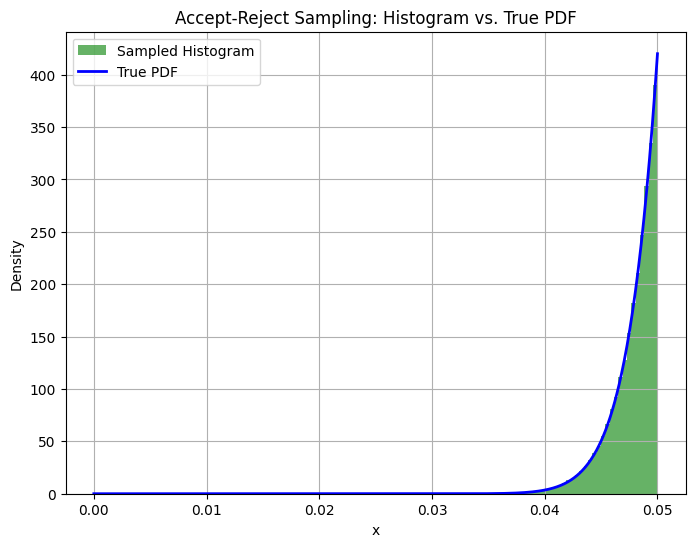

In [69]:
import matplotlib.pyplot as plt
x = np.linspace(1e-6, 1/20, 1000)  # 在定义域 [1e-6, 1/20] 上计算
y_true = 20 * (1 + 1 / x) * np.exp(20 - 1 / x)  # 真实概率密度

plt.figure(figsize=(8, 6))
plt.hist(s, bins=50, density=True, alpha=0.6, color='g', label='Sampled Histogram')
plt.plot(x, y_true, 'b-', label='True PDF', linewidth=2)
plt.title("Accept-Reject Sampling: Histogram vs. True PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#### This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")
    
try:
    assert(isinstance(problem1_samples, np.ndarray))
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")
    
try:
    assert(isinstance(problem1_integral, float))
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

    
try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval,tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

    
try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标分布的概率密度函数 f(x)
def target_density(x):
    if 0 < x < 1/20:
        return 20 * np.exp(20 - 1/x) * (1 + 1/x)
    return 0

# 定义辅助分布的密度函数 g(x) (指数分布)
def proposal_density(x):
    return 20 * np.exp(-20 * x)  # 指数分布的密度函数

# 计算常数 c (f(x) 的最大值)
def compute_c():
    x_values = np.linspace(0.001, 1/20, 1000)  # 避免 x = 0
    f_values = [target_density(x) for x in x_values]
    g_values = [proposal_density(x) for x in x_values]
    c = max([f / g for f, g in zip(f_values, g_values)])
    print(f"Computed c: {c}")  # 添加调试信息
    return c

# 拒绝采样算法
@timeout(seconds=1)
def rejection_sampling(num_samples):
    c = compute_c()  # 确定常数 c
    samples = []
    iterations = 0  # 添加计数器

    while len(samples) < num_samples:
        iterations += 1
        if iterations % 10000 == 0:
            print(f"Iterations: {iterations}, Samples: {len(samples)}")  # 添加调试信息

        # 从辅助分布（指数分布）生成候选样本
        x = np.random.exponential(1/20)
        if x > 1/20:
            continue  # 跳过超出范围的样本
        u = np.random.uniform(0, c * proposal_density(x))  # 从 [0, c * g(x)] 中生成随机值

        # 计算目标分布的密度值
        f_x = target_density(x)

        # 判断是否接受样本
        if u <= f_x:
            samples.append(x)

    return samples

# 生成样本
num_samples = 10000
samples = rejection_sampling(num_samples)



Computed c: 55.971202630989595
Iterations: 10000, Samples: 170
Iterations: 20000, Samples: 359
Iterations: 30000, Samples: 538
Iterations: 40000, Samples: 723
Iterations: 50000, Samples: 904
Iterations: 60000, Samples: 1090
Iterations: 70000, Samples: 1256
Iterations: 80000, Samples: 1433
Iterations: 90000, Samples: 1623
Iterations: 100000, Samples: 1795
Iterations: 110000, Samples: 1985
Iterations: 120000, Samples: 2168
Iterations: 130000, Samples: 2358
Iterations: 140000, Samples: 2530
Iterations: 150000, Samples: 2710
Iterations: 160000, Samples: 2884
Iterations: 170000, Samples: 3083
Iterations: 180000, Samples: 3256
Iterations: 190000, Samples: 3427
Iterations: 200000, Samples: 3596
Iterations: 210000, Samples: 3745
Iterations: 220000, Samples: 3913
Iterations: 230000, Samples: 4091
Iterations: 240000, Samples: 4257
Iterations: 250000, Samples: 4419
Iterations: 260000, Samples: 4610
Iterations: 270000, Samples: 4802
Iterations: 280000, Samples: 4985
Iterations: 290000, Samples: 51

## Problem 2

把数据放到合适地方再跑！！！！

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        
        logits = np.dot(X, coeffs[1:]) + coeffs[0]
        predictions = 1 / (1 + np.exp(-logits))  # 使用 sigmoid 函数得到概率
        # 计算负对数似然损失
        loss_value = -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
        return loss_value

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration



df_spam = pd.read_csv("data/spam.csv",encoding='latin')
df_spam['label'] = df_spam['v1'].apply(lambda x: 1 if x == 'spam' else 0)
df_spam['free'] = df_spam['v2'].apply(lambda x: 1 if 'free' in x else 0)
df_spam['prize'] = df_spam['v2'].apply(lambda x: 1 if 'prize' in x else 0)
df_spam['win'] = df_spam['v2'].apply(lambda x: 1 if 'win' in x else 0)

problem3_X = df_spam.iloc[:, 6:9].to_numpy(dtype=np.int64)
problem3_Y = df_spam.iloc[:, 5].to_numpy(dtype=np.int64)

n_samples = problem3_X.shape[0]


# 随机打乱数据的索引
indices = np.random.permutation(n_samples)

# 计算划分点
train_end = int(0.4 * n_samples)  # 训练集的结束位置（40%）
calib_end = int(0.6 * n_samples)  # 校准集的结束位置（60%）

# 使用切片根据划分点提取数据
train_indices = indices[:train_end]
calib_indices = indices[train_end:calib_end]
test_indices = indices[calib_end:]

# 划分特征和标签
problem3_X_train = problem3_X[train_indices]
problem3_X_calib = problem3_X[calib_indices]
problem3_X_test = problem3_X[test_indices]

problem3_Y_train = problem3_Y[train_indices]
problem3_Y_calib = problem3_Y[calib_indices]
problem3_Y_test = problem3_Y[test_indices]

print(problem3_X_train.shape,problem3_X_calib.shape,problem3_X_test.shape,problem3_Y_train.shape,problem3_Y_calib.shape,problem3_Y_test.shape)

In [ ]:

problem3_ps = ProportionalSpam()
problem3_ps.fit(problem3_X_train, problem3_Y_train)


problem3_X_pred = problem3_ps.predict(problem3_X_calib).reshape(-1, 1)

problem3_calibrator = DecisionTreeRegressor()
problem3_calibrator.fit(problem3_X_pred, problem3_Y_calib)

In [ ]:
test_pred_raw = problem3_ps.predict(problem3_X_test).reshape(-1, 1)
problem3_final_predictions = problem3_calibrator.predict(test_pred_raw)

In [ ]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

## Problem 3

Suppose A for state 0, B for state 1, C for state 2, D for state 3 \
state numbers are also matched with index number

In [37]:
import numpy as np
import networkx as nx
from functools import reduce
from math import gcd
from scipy.linalg import eig

In [33]:
#转移矩阵
P_A = np.array([[0.8, 0.2, 0.0,0.0],
              [0.6, 0.2, 0.2,0.0],
              [0.0, 0.4, 0.0,0.6],
              [0.0, 0.0, 0.8,0.2]])

P_B = np.array([[0.0, 0.2, 0.0,0.8],
              [0.0, 0.0, 1.0,0.0],
              [0.0, 1.0, 0.0,0.0],
              [0.5, 0.0, 0.5,0.0]])

P_C = np.array([[0.2, 0.3, 0.0,0.0,0.5],
               [0.2, 0.2, 0.6,0.0,0.0],
              [0.0, 0.4, 0.0,0.6,0.0],
              [0.0, 0.0, 0.0,0.6,0.4],
               [0.0,0.0,0.0,0.4,0.6]])

P_D = np.array([[0.8, 0.2, 0.0,0.0],
              [0.6, 0.2, 0.2,0.0],
              [0.0, 0.4, 0.0,0.6],
              [0.1, 0.0, 0.7,0.2]])

In [34]:
Ps=[P_A,P_B,P_C,P_D]
# 验证转移矩阵的合法性
def is_valid_transition_matrix(P):
    # 1. 检查是否为方阵
    if P.shape[0] != P.shape[1]:
        return False, "The matrix is not square."

    # 2. 检查是否所有元素为非负数
    if not np.all(P >= 0):
        return False, "The matrix contains negative elements."

    # 3. 检查每行是否归一化为 1
    if not np.allclose(np.sum(P, axis=1), 1):
        return False, "The rows do not sum to 1."

    return True, "The matrix is a valid transition matrix."

# 验证转移矩阵
is_vlid_list=[]
for i, p in enumerate(Ps):  # 使用 enumerate 获取索引 i 和矩阵 p
    is_valid, message = is_valid_transition_matrix(p)
    is_vlid_list.append(is_valid)
    
    # 输出验证结果
    print(f"Markov chain and Digraph have been successfully constructed.")
    print(f"The size of transition matrix P_{i} is: {p.shape}")
    print(f"Whether it is a qualified transition matrix: {message}")


# 如果转移矩阵有效，构建有向图
G_list=[]
for i, p in enumerate(Ps):
    if is_vlid_list[i]:
        # 1. 构建有向图
        G = nx.DiGraph()
        
        # 添加边和权重
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if p[i, j] > 0:  # 仅添加非零权重的边
                    G.add_edge(i, j, weight=p[i, j])
        
        # 打印构建结果
        print("The directed graph (Digraph) has been successfully constructed.")
        print("Number of nodes:", G.number_of_nodes())
        print("Number of edges:", G.number_of_edges())
    
        # 可视化或分析
        print("Graph edges with weights:")
        for u, v, data in G.edges(data=True):
            print(f"Edge from {u} to {v}, weight = {data['weight']}")
        G_list.append(G)
    else:
        print("The transition matrix is not valid. Please check your input.")
        G_list.append(None)


Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_0 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_1 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_2 is: (5, 5)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_3 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
The directed graph (Digraph) has been successfully constructed.
Number of nodes: 4
Number of edges: 9
Graph edges with weights:
Edge from 0 to 0, weight = 0.8
Edge from 0 to 1, weight = 0.2
Edge from 1 to 0, weight = 0.6
Edge from 1

In [35]:
#irreducible
for G in G_list:
    is_irreducible = nx.is_strongly_connected(G)
    print("Is the Markov chain irreducible?", is_irreducible)


Is the Markov chain irreducible? True
Is the Markov chain irreducible? False
Is the Markov chain irreducible? False
Is the Markov chain irreducible? True


In [36]:
#period
# 3. 计算状态的周期

# 计算状态 x 的返回时间集 T(x)
def get_return_times(P, x):
    n = len(P)
    times = []
    for t in range(1, n+1):
        if np.linalg.matrix_power(P, t)[x, x] > 0:
            times.append(t)
    return times

# 计算状态的周期

for P in Ps:
    periods = {}
    for x in range(len(P)):
        T_x = get_return_times(P, x)
        period = reduce(gcd, T_x)
        periods[x] = period
    
    # 输出结果
    for state, period in periods.items():
        print(f"State {state} has period: {period}")
        if period == 1:
            print(f"State {state} is aperiodic")
        else:
            print(f"State {state} is not aperiodic")
    print('\n')


State 0 has period: 1
State 0 is aperiodic
State 1 has period: 1
State 1 is aperiodic
State 2 has period: 1
State 2 is aperiodic
State 3 has period: 1
State 3 is aperiodic


State 0 has period: 2
State 0 is not aperiodic
State 1 has period: 2
State 1 is not aperiodic
State 2 has period: 2
State 2 is not aperiodic
State 3 has period: 2
State 3 is not aperiodic


State 0 has period: 1
State 0 is aperiodic
State 1 has period: 1
State 1 is aperiodic
State 2 has period: 1
State 2 is aperiodic
State 3 has period: 1
State 3 is aperiodic
State 4 has period: 1
State 4 is aperiodic


State 0 has period: 1
State 0 is aperiodic
State 1 has period: 1
State 1 is aperiodic
State 2 has period: 1
State 2 is aperiodic
State 3 has period: 1
State 3 is aperiodic




In [45]:
#stationary distribution
# 4. 平稳分布 (stationary distribution)
stt_st=[]
for P in Ps:
    w, v = eig(P, left=True, right=False)
    stationary = np.real(v[:, np.isclose(w, 1)])
    stationary = stationary / stationary.sum()
    stt_st.append(stationary)
    print("Stationary distribution:", stationary.ravel())
    print('\n')

Stationary distribution: [0.61538462 0.20512821 0.1025641  0.07692308]


Stationary distribution: [0.  0.5 0.5 0. ]


Stationary distribution: [0.  0.  0.  0.5 0.5]


Stationary distribution: [0.64516129 0.20430108 0.08602151 0.06451613]




In [41]:
#reversible
for stationary in stt_st:
    # 计算平稳分布 π
    stationary = stationary.ravel()  # 将平稳分布从二维转换为一维
    is_reversible = True  # 初始假设是可逆的
    
    # 遍历所有状态对 (i, j)
    for i in range(len(P)):
        for j in range(len(P)):
            if not np.isclose(stationary[i] * P[i, j], stationary[j] * P[j, i]):
                is_reversible = False
                break
        if not is_reversible:
            break
    
    print("Is the Markov chain reversible?", is_reversible)

Is the Markov chain reversible? False
Is the Markov chain reversible? False
Is the Markov chain reversible? False
Is the Markov chain reversible? False
